<h1><center>Praktikum Eksplorasi dan Visualisasi Data</center></h1>
<h2><center>Dosen Pengampu Edi Satriyanto</center></h2>


<img src="logo pens.png" 
        alt="Picture" 
        width="380" 
        height="380" 
        style="display: block; margin: 0 auto" />

<h3><center>Wahyu Ikbal Maulana</center></h3>

<h3><center>3323600056</center></h3>

<h3><center>D4 SDT B</center></h3>

<h1><center>Politeknik Elektronika Negeri Surabaya</center></h1>




## <b><span style='color:#FA5E3C'>|</span> Analisa </b> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('Tokokita.xlsx', sheet_name='Toko')
df

Tanggal   Kode Barang                          Nama Barang  \
0   2020-01-03  8.992779e+12  GLADE GANTUNG NOUNTAIN PINE 75+10GR   
1   2020-01-04  2.011040e+05                     SARDEN ABC KECIL   
2   2020-01-06  2.028080e+05              BANGO KECAP BOTOL 135ml   
3   2020-01-08  8.992747e+12              VIXAL HARUM SEGAR 780ML   
4   2020-01-10  7.000090e+05      RINSO DETERGENT ANTI NODA 800GR   
..         ...           ...                                  ...   
796        NaT           NaN                                  NaN   
797        NaT           NaN                                  NaN   
798        NaT           NaN                                  NaN   
799        NaT           NaN                                  NaN   
800        NaT           NaN                                  NaN   

             Kategori  Sat    Qty  Jual(Rp)  Beli(Rp)  Penjualan  Pembelian  \
0             PEWANGI  pcs   77.0   11000.0    9600.0   847000.0   739200.0   
1              DAGING  can  244.0   10000.0    7500.0  2440000.0  1830000.0   
2               KECAP  btl  100.0   11000.0    9570.0  1100000.0   957000.0   
3    PEMBERSIH LANTAI  pcs  169.0   17000.0   15290.0  2873000.0  2584010.0   
4            DETERGEN  pcs   50.0   21800.0   19580.0  1090000.0   979000.0   
..                ...  ...    ...       ...       ...        ...        ...   
796               NaN  NaN    NaN       NaN       NaN        NaN        NaN   
797               NaN  NaN    NaN       NaN       NaN        NaN        NaN   
798               NaN  NaN    NaN       NaN       NaN        NaN        NaN   
799               NaN  NaN    NaN       NaN       NaN        NaN        NaN   
800               NaN  NaN    NaN       NaN       NaN        NaN        NaN   

        Region             City  
0    West Java            Depok  
1      Jakarta    North Jakarta  
2      Jakarta    South Jakarta  
3      Jakarta    North Jakarta  
4    West Java           Bekasi  
..         ...              ...  
796    Jakarta    North Jakarta  
797    Jakarta  Central Jakarta  
798    Jakarta     West Jakarta  
799    Jakarta     East Jakarta  
800    Jakarta     East Jakarta  

[801 rows x 12 columns]

In [3]:
print(df.info())

print(df.describe())

print("\
Missing values:")
print(df.isnull().sum())

print("\
Duplicate rows:", df.duplicated().sum())

print("\
Date range:")
print(df['Tanggal'].min(), "to", df['Tanggal'].max())
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      400 non-null    datetime64[ns]
 1   Kode Barang  400 non-null    float64       
 2   Nama Barang  400 non-null    object        
 3   Kategori     400 non-null    object        
 4   Sat          400 non-null    object        
 5   Qty          400 non-null    float64       
 6   Jual(Rp)     399 non-null    float64       
 7   Beli(Rp)     399 non-null    float64       
 8   Penjualan    400 non-null    float64       
 9   Pembelian    400 non-null    float64       
 10  Region       801 non-null    object        
 11  City         801 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 75.2+ KB
None
                   Tanggal   Kode Barang         Qty       Jual(Rp)  \
count                  400  4.000000e+02  400.000000     399.

## <b><span style='color:#FA5E3C'>|</span> Visualisasi </b> 

C:\Users\M S I\AppData\Local\Temp\ipykernel_23508\1138883959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])
C:\Users\M S I\AppData\Local\Temp\ipykernel_23508\1138883959.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales.resample(freq).sum().plot(ax=axes[i])


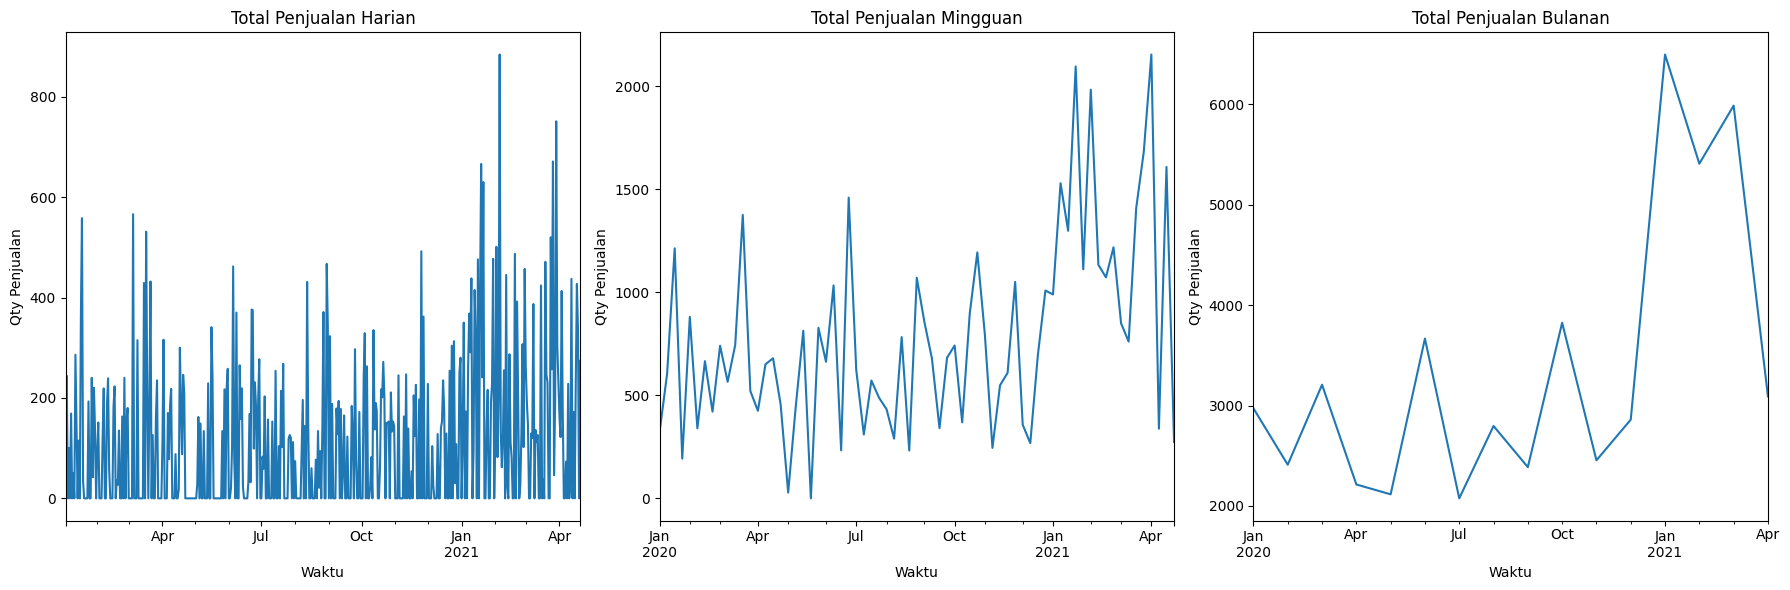

In [4]:
# Ubah tipe data dan hitung penjualan
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
sales = df.groupby('Tanggal')['Qty'].sum()

# Buat plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
freqs = ['D', 'W', 'M']
titles = ['Harian', 'Mingguan', 'Bulanan']

for i, (freq, title) in enumerate(zip(freqs, titles)):
    sales.resample(freq).sum().plot(ax=axes[i])
    axes[i].set(title=f'Total Penjualan {title}', xlabel='Waktu', ylabel='Qty Penjualan')

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b>
    Dari visualisasi di atas dapat disimpulkan bahwa total penjualan toko di akhir 2020 hingga awal 2021 mengalami lonjakan, mungkin karena efek dari COVID-19. Hasil penjualan cenderung fluktuatif.
</div>

C:\Users\M S I\AppData\Local\Temp\ipykernel_23508\250268152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['Penjualan'] - df['Pembelian']
C:\Users\M S I\AppData\Local\Temp\ipykernel_23508\250268152.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit_bulanan = df.groupby(pd.Grouper(key='Tanggal', freq='M'))['Profit'].sum().reset_index()


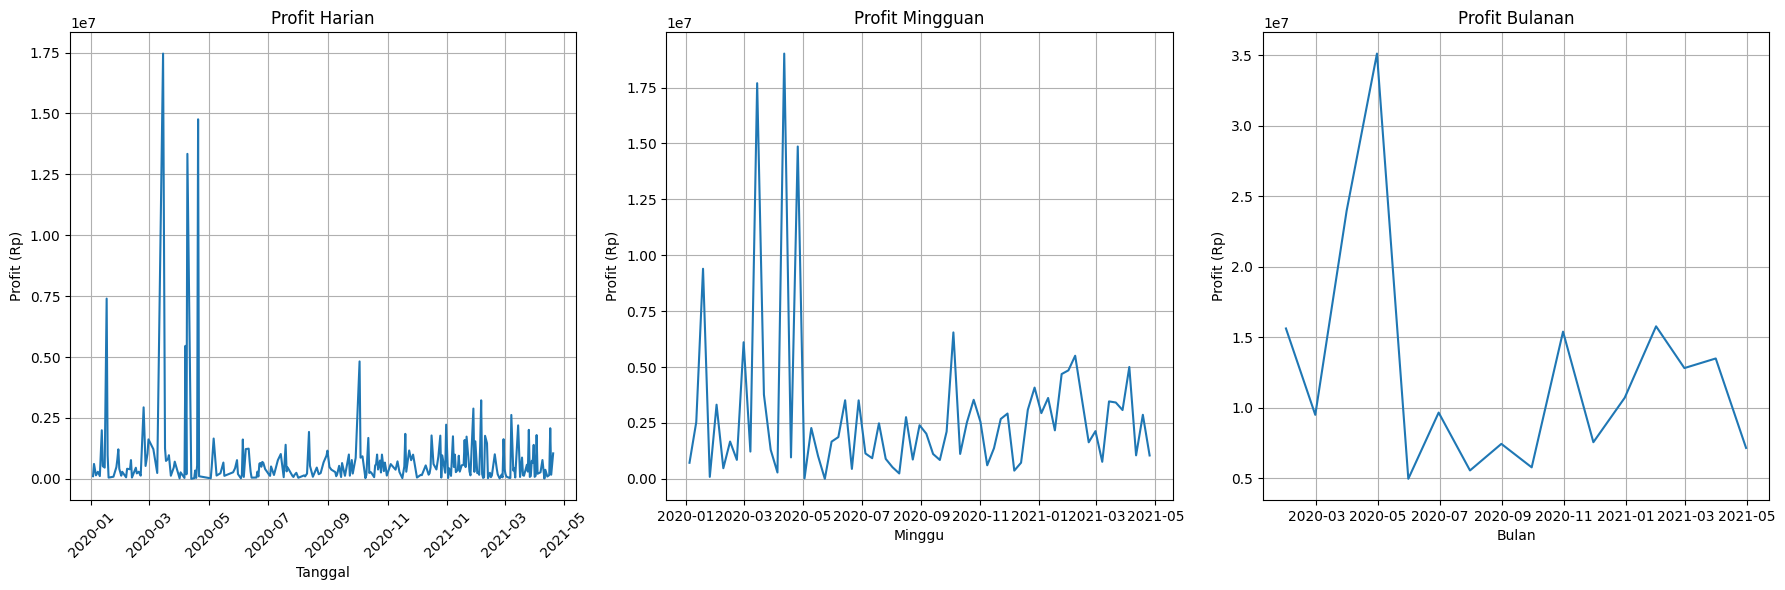

In [5]:
# Menghitung profit
df['Profit'] = df['Penjualan'] - df['Pembelian']

# Mengelompokkan data berdasarkan tanggal, minggu, dan bulan
profit_harian = df.groupby('Tanggal')['Profit'].sum().reset_index()
profit_mingguan = df.groupby(pd.Grouper(key='Tanggal', freq='W'))['Profit'].sum().reset_index()
profit_bulanan = df.groupby(pd.Grouper(key='Tanggal', freq='M'))['Profit'].sum().reset_index()

# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot profit harian
axes[0].plot(profit_harian['Tanggal'], profit_harian['Profit'], linestyle='-')
axes[0].set_title('Profit Harian')
axes[0].set_xlabel('Tanggal')
axes[0].set_ylabel('Profit (Rp)')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot profit mingguan
axes[1].plot(profit_mingguan['Tanggal'], profit_mingguan['Profit'], linestyle='-')
axes[1].set_title('Profit Mingguan')
axes[1].set_xlabel('Minggu')
axes[1].set_ylabel('Profit (Rp)')
axes[1].grid(True)

# Plot profit bulanan
axes[2].plot(profit_bulanan['Tanggal'], profit_bulanan['Profit'], linestyle='-')
axes[2].set_title('Profit Bulanan')
axes[2].set_xlabel('Bulan')
axes[2].set_ylabel('Profit (Rp)')
axes[2].grid(True)

# Sesuaikan jarak antar subplot
plt.tight_layout()

plt.show()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b>
    Dari visualisasi di atas dapat disimpulkan bahwa total penjualan toko di akhir 2020 hingga awal 2021 mengalami lonjakan, mungkin karena efek dari COVID-19. Hasil penjualan cenderung fluktuatif.
</div>

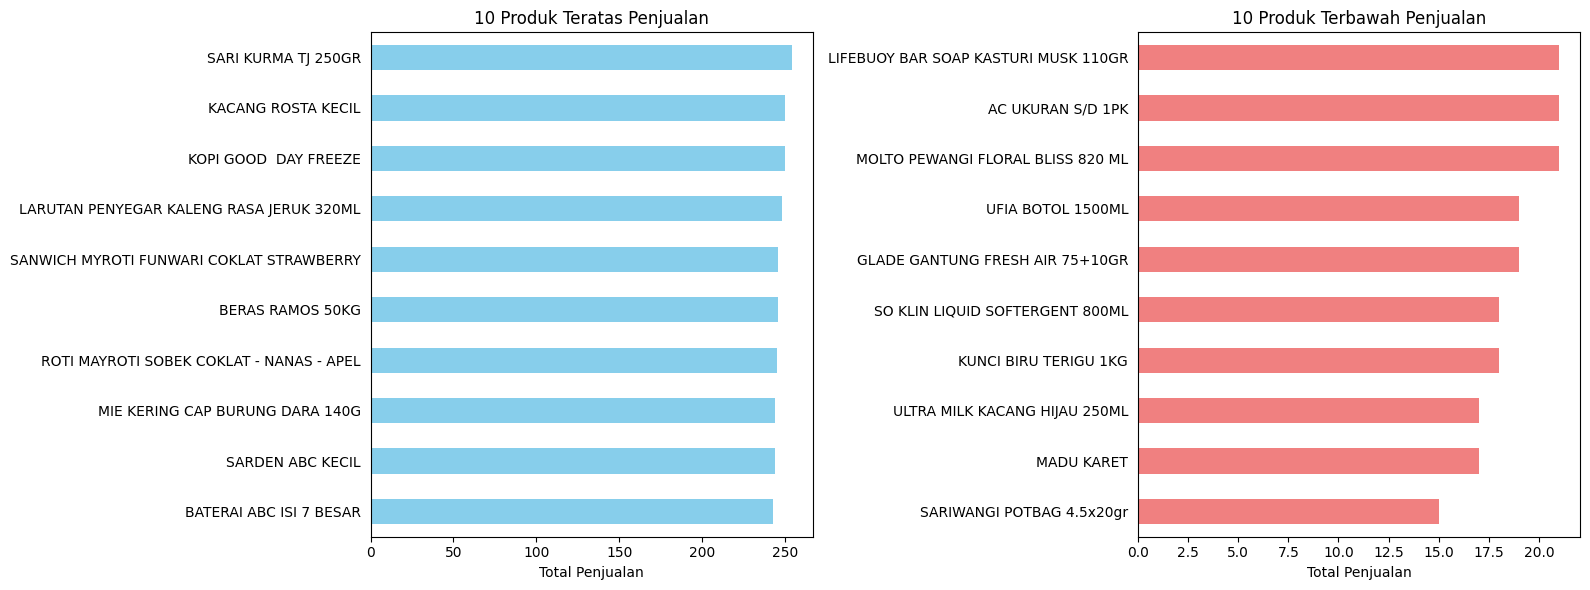

In [9]:
# Kelompokkan data dan dapatkan 10 produk teratas dan terbawah
sales_by_product = df.groupby('Nama Barang')['Qty'].sum().sort_values()
top_10 = sales_by_product.iloc[-10:]
bottom_10 = sales_by_product.iloc[:10]

# Buat plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plots = [(top_10, 'Teratas', 'skyblue'), (bottom_10, 'Terbawah', 'lightcoral')]

for i, (data, label, color) in enumerate(plots):
    data.plot(kind='barh', ax=axes[i], color=color)
    axes[i].set(title=f'10 Produk {label} Penjualan', xlabel='Total Penjualan', ylabel='')
    axes[i].tick_params(left=False)

plt.tight_layout()
plt.show()

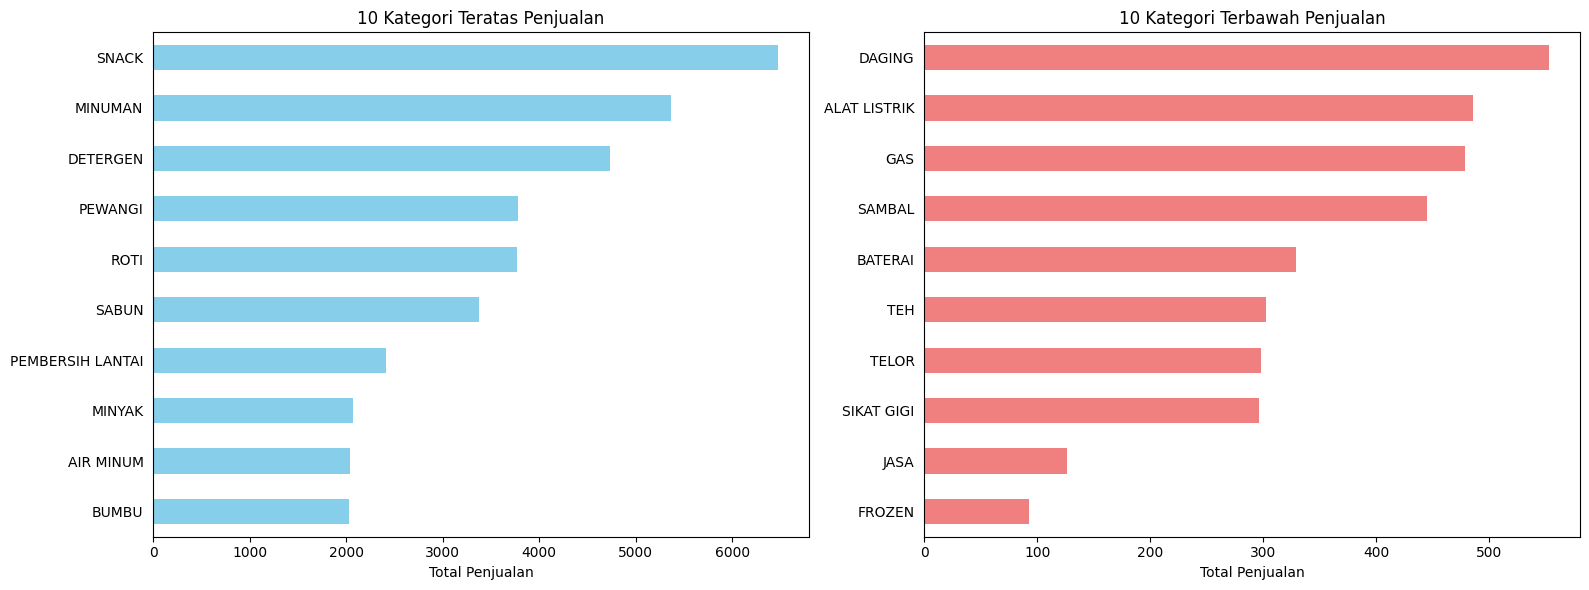

In [13]:
# Kelompokkan data dan dapatkan 10 produk teratas dan terbawah
sales_by_product = df.groupby('Kategori')['Qty'].sum().sort_values()
top_10 = sales_by_product.iloc[-10:]
bottom_10 = sales_by_product.iloc[:10]

# Buat plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plots = [(top_10, 'Teratas', 'skyblue'), (bottom_10, 'Terbawah', 'lightcoral')]

for i, (data, label, color) in enumerate(plots):
    data.plot(kind='barh', ax=axes[i], color=color)
    axes[i].set(title=f'10 Kategori {label} Penjualan', xlabel='Total Penjualan', ylabel='')
    axes[i].tick_params(left=False)

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b>
    Dari visualisasi di atas kita dapat mendapatkan sebuah insight produk dan kategori apa yang paling laris terjual di toko. Disini kita bisa mengevaluasi untuk tren peminat customer sehingga bisa menyediakan stock lebih banyak lagi

</div>

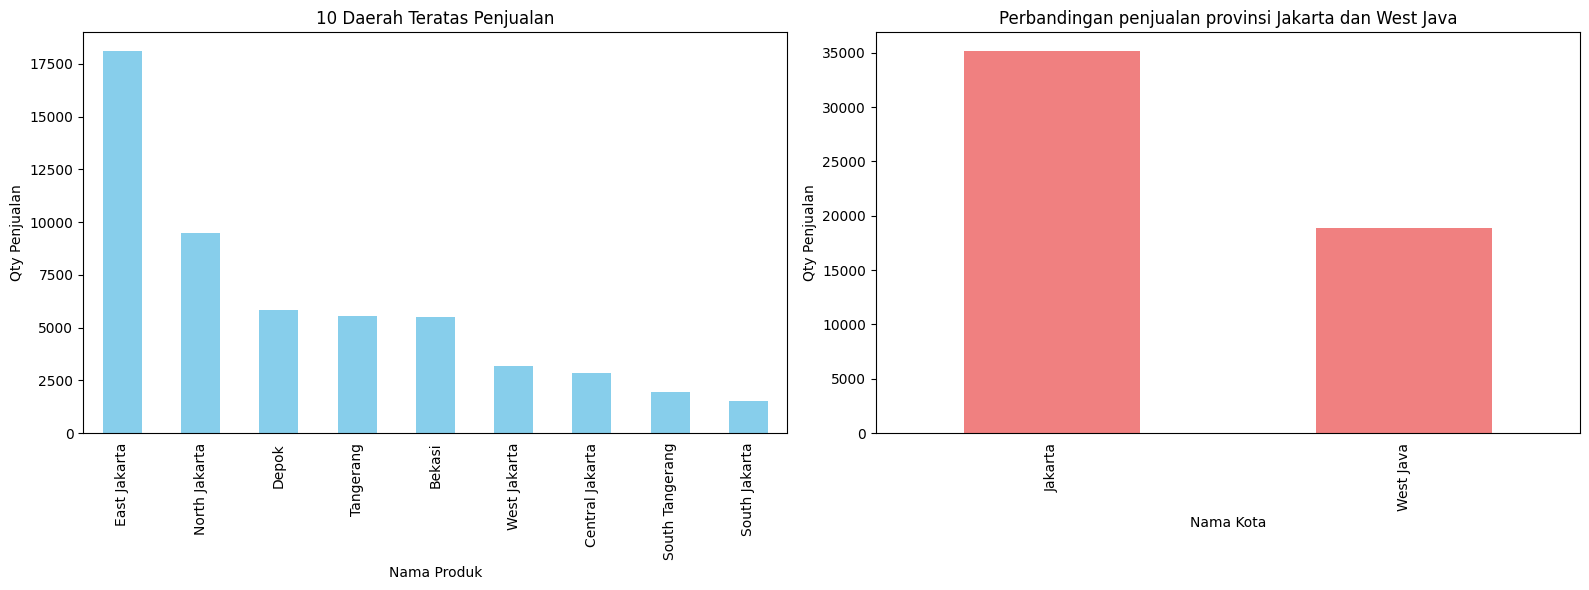

In [15]:
# Kelompokkan data dan dapatkan 10 produk teratas dan terbawah berdasarkan penjualan
province = df.groupby('City')['Qty'].sum().sort_values(ascending=False).head(9)
kota = df.groupby('Region')['Qty'].sum().sort_values(ascending=False).head(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

province.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('10 Daerah Teratas Penjualan')
axes[0].set_xlabel('Nama Produk')
axes[0].set_ylabel('Qty Penjualan')
axes[0].tick_params(bottom=False)

kota.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Perbandingan penjualan provinsi Jakarta dan West Java')
axes[1].set_xlabel('Nama Kota')
axes[1].set_ylabel('Qty Penjualan')
axes[1].tick_params(bottom=False)

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b>
    Dari visualisasi di atas kita dapat mendapatkan sebuah insight daerah dengan penjualan paling tinggi. Lalu Terdapat komparasi perbandingan penjualan provinsi Jakarta dan Region Jakarta dan West Java. Sehingga visualisasi ini dapat dijadikan dasar untuk target marketing yang disesuaikan dengan lokasi customer.
    

</div>